In [66]:
import pandas as pd


data = pd.read_csv('datasets/diabetes.csv')


data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


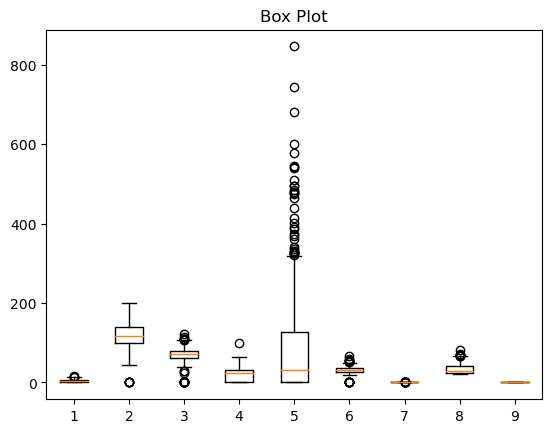

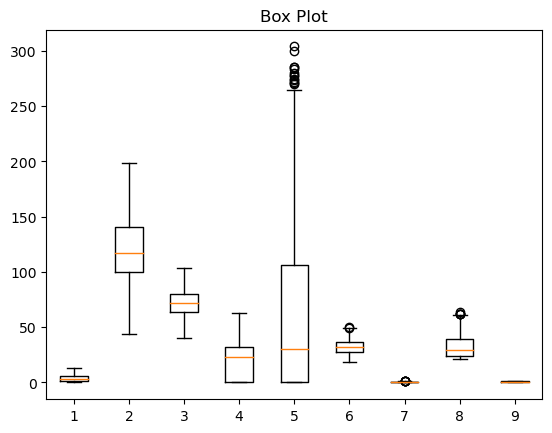

In [67]:
## EDA 


data.describe(include='all')
import numpy as np
## replace the outlier with mean

rawdata = data.copy()

for j in data :
    for i in data[j]:
        q1 = data[j]. quantile(0.25)
        q3 = data[j]. quantile (0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3+ 1.5 * iqr
        if i > Upper_tail or i < Lower_tail:
            data[j] = data[j].replace(i, np.mean (data[j]))





import matplotlib.pyplot as plt


def outliers_boxplot(data):
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)  
    # Set showfliers=True to show outliers
    plt.title('Box Plot')
    plt.show()

outliers_boxplot(rawdata)
outliers_boxplot(data)


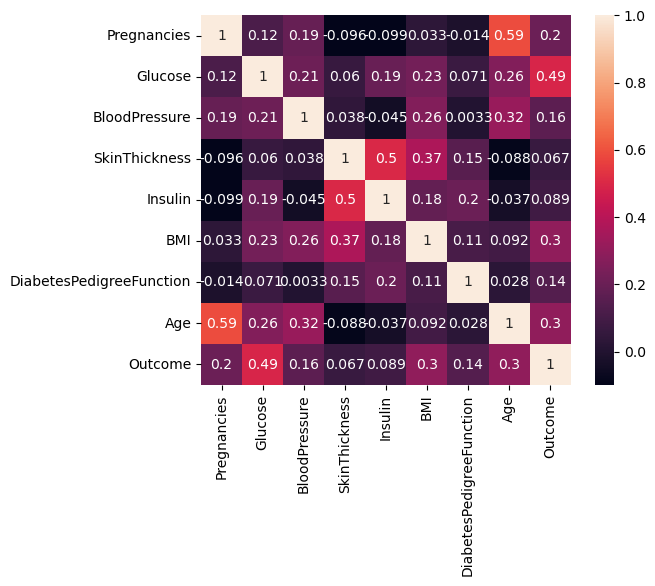

In [68]:
import seaborn as sns

corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()


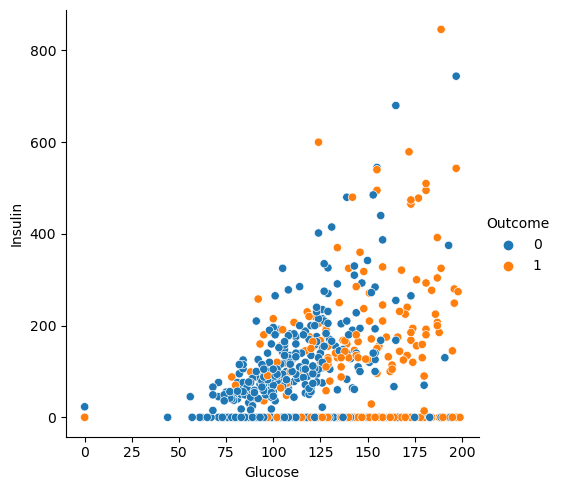

In [69]:
sns.relplot(x='Glucose', y='Insulin', hue='Outcome', data=rawdata)

In [70]:

cor_target = abs(corr["Outcome"])
rel_feature = cor_target[cor_target>0.1]
rel_feature

Pregnancies                 0.204319
Glucose                     0.492908
BloodPressure               0.163496
BMI                         0.297746
DiabetesPedigreeFunction    0.141952
Age                         0.297308
Outcome                     1.000000
Name: Outcome, dtype: float64

In [71]:

X = data.drop(["Outcome"],axis= 1 )
column_name = []
for col in data.columns:
    if col in rel_feature :
        column_name.append(col)
column_name.remove("Outcome")
x = X[column_name]
y = data['Outcome']


In [72]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
 

In [77]:
from keras.regularizers import l2


model = Sequential(
    [
        Dense(units = 6,kernel_initializer='random_normal',bias_initializer='zeros', activation = 'relu',kernel_regularizer= l2(0.01) ,name = 'layer1'),
        Dense(units = 3,kernel_initializer='random_normal',bias_initializer='zeros', activation = 'relu',kernel_regularizer= l2(0.01) , name = 'layer2'),
        Dense(units =1,kernel_initializer='random_normal',bias_initializer='zeros',activation= 'sigmoid' , kernel_regularizer= l2(0.01) ,name="outputlayer")
        ]
    
)


model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.001,decay =0.01),metrics=['accuracy'])



Train: 0.641, Test: 0.666


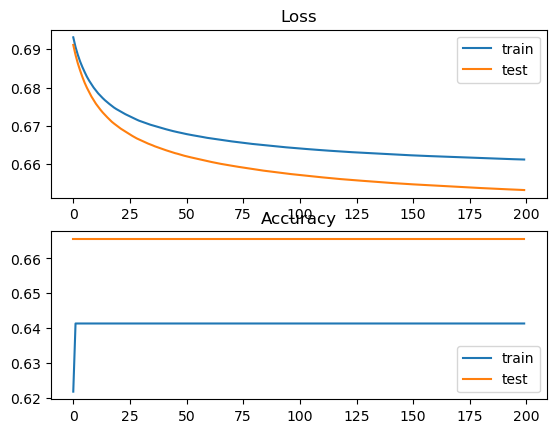

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training


plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()